In [1]:
import pandas as pd

In [2]:
# read built dataset
df = pd.read_csv('../../feature_engineering/datasets/built_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440716 entries, 0 to 440715
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   item_name                  440716 non-null  object 
 1   category_name              440716 non-null  object 
 2   date                       440716 non-null  object 
 3   time                       440716 non-null  int64  
 4   item_code                  440716 non-null  int64  
 5   quantity_sold_kg           440716 non-null  float64
 6   unit_selling_price_rmb/kg  440716 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 23.5+ MB


In [3]:
# drop non-dependant columns
df = df.drop(columns=['item_code', 'time'])
df.sample(2)

,item_name,category_name,date,quantity_sold_kg,unit_selling_price_rmb/kg
151960,yunnan shengcai,flower,2021-07-23,0.2,8.0
174040,wuhu green pepper,capsicum,2021-08-16,0.2,7.0


<Axes: >

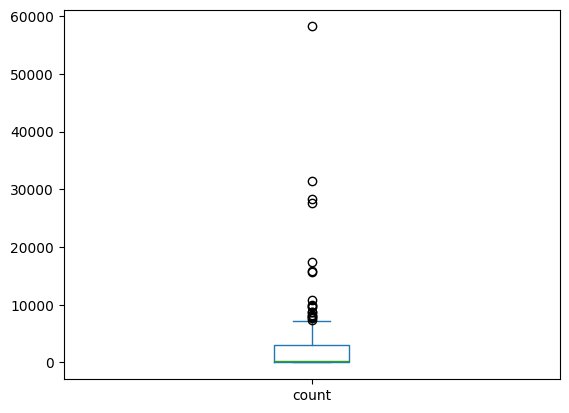

In [4]:
# visualise frequency of selling an item
df['item_name'].value_counts().plot.box()

In [5]:
"""according to the above boxplot there are some items that are sold more than 5000 times. 
    they can be considered as hot selling items and no need to predict a discount on them"""

# drop hot selling items
(df['item_name'].value_counts() > 2000).sum()

48

In [6]:
import numpy as np

In [7]:
# rename top selling items as 'Other'
filt = (df['item_name'].value_counts() > 2000)
df['item_name'] = np.where(filt[df['item_name'].values], 'Other', df['item_name'])
filt = df['item_name'] == 'Other'
df = df.loc[~filt]

df['item_name'].unique().shape[0]

104

<Axes: >

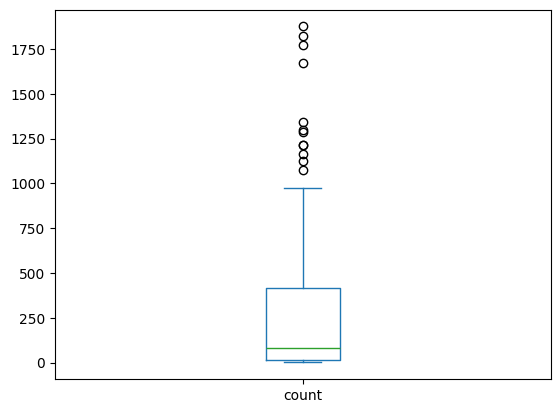

In [8]:
# visualise frequency of selling for rest of items
df['item_name'].value_counts().plot.box()

<Axes: >

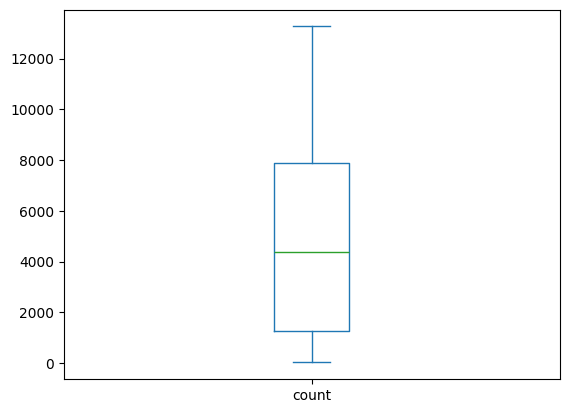

In [9]:
# visualise frequency of selling an category
df['category_name'].value_counts().plot.box()

<Axes: >

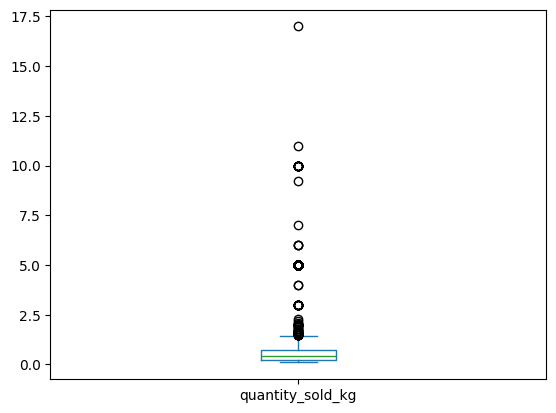

In [10]:
# visualise sold amount
df['quantity_sold_kg'].plot.box()

<Axes: >

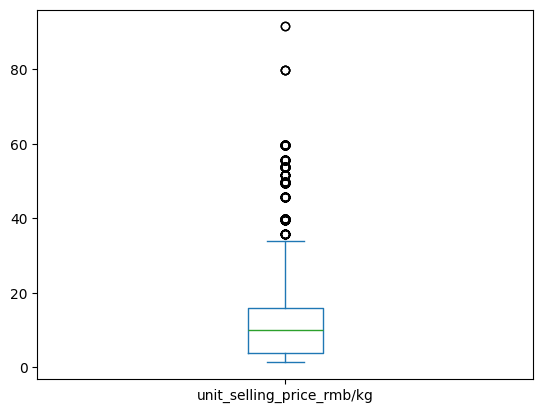

In [11]:
# visualise price
df['unit_selling_price_rmb/kg'].plot.box()

In [12]:
df.head(3)

,item_name,category_name,date,quantity_sold_kg,unit_selling_price_rmb/kg
10,jigu mushroom,mushroom,2021-01-01,0.2,16.0
35,bell pepper,capsicum,2021-01-01,0.3,16.0
76,fresh black fungus,mushroom,2021-01-01,0.2,14.0


In [13]:
"""according to the above boxplot there are some items that are sold more than 50 rmb/kg. 
    they can be considered as rare items and by selling very less amount of them aslo can be considered as hot selling. so it is better to not to predict a discount on them"""

# group dataset by item name, category and date
df = df.groupby(['date', 'item_name', 'category_name']).mean().reset_index()
df.head(3)

,date,item_name,category_name,quantity_sold_kg,unit_selling_price_rmb/kg
0,2021-01-01,7 colour pepper,capsicum,0.3875,18.0
1,2021-01-01,bell pepper,capsicum,0.2500,16.0
2,2021-01-01,caidian quinoa artemisia,flower,0.2500,19.8


In [14]:
# store daily mean dataset with date for future use
df.to_csv('../datasets/daily_mean.csv', index=False)
df = df.drop(columns=['date'])
df.sample(3)

,item_name,category_name,quantity_sold_kg,unit_selling_price_rmb/kg
1992,7 colour pepper,capsicum,0.220000,16.0
4770,local xiaomao cabbage,flower,0.700000,4.0
1948,haixian mushroom,mushroom,0.261538,14.0


<Axes: >

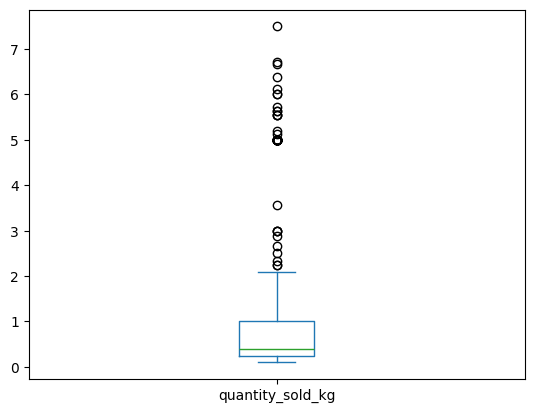

In [15]:
# visualise processed sold amount
df['quantity_sold_kg'].plot.box()

In [16]:
# check the mean of sold amount
np.mean(df['quantity_sold_kg'])

0.5767198725382202

<Axes: >

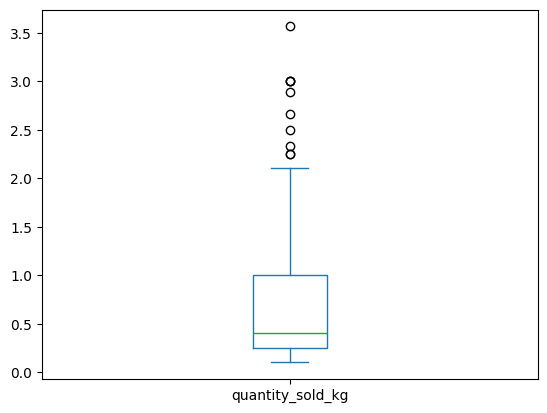

In [17]:
"""according to the above boxplot there are some items that are sold more than 2 kg per day. 
    they can be considered as hot selling items and no need to predict a discount on them"""

# remove top selling items
filt = df['quantity_sold_kg'] > 4
df = df.loc[~filt]
df['quantity_sold_kg'].plot.box()

In [18]:
np.mean(df['quantity_sold_kg'])

0.5211476325853348

In [19]:
df['item_name'].unique().shape[0]

104

<Axes: >

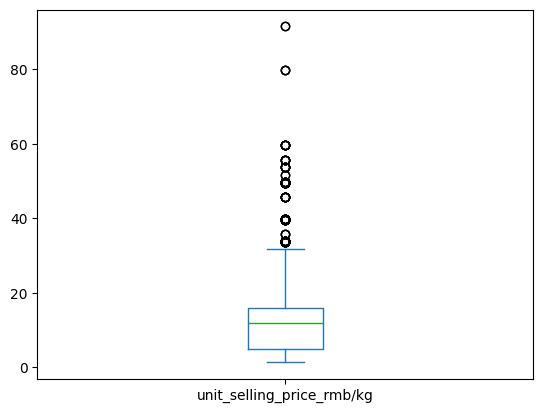

In [20]:
# visualise unit selling price
df['unit_selling_price_rmb/kg'].plot.box()

In [21]:
filt_rare = df['unit_selling_price_rmb/kg'] > 65
df = df.loc[~filt_rare]
df['item_name'].unique().shape[0]

103

In [22]:
# view co-relation between price and sold amount
df.loc[:,['unit_selling_price_rmb/kg', 'quantity_sold_kg']].corr()

,unit_selling_price_rmb/kg,quantity_sold_kg
unit_selling_price_rmb/kg,1.000000,-0.522964
quantity_sold_kg,-0.522964,1.000000


<Axes: xlabel='unit_selling_price_rmb/kg', ylabel='quantity_sold_kg'>

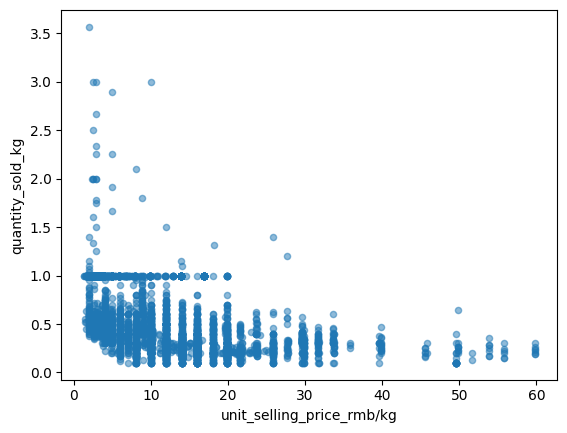

In [23]:
# visualise relation between price and sold amount
df.plot.scatter(x = 'unit_selling_price_rmb/kg', y = 'quantity_sold_kg', alpha = 0.5)

In [24]:
# one hot encoding
df = pd.get_dummies(df)
df.shape

(4949, 111)

In [25]:
df.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_basil,item_name_bell pepper,item_name_big broccoli,item_name_black chicken fir bacteria,item_name_black rapeseed,...,item_name_yuganjiao,item_name_yuxingcao,item_name_yuxingcao,item_name_zhimaxiancai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
1280,0.300000,12.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3109,0.157143,45.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3275,0.366667,12.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [26]:
# save pre-processed dataset
df.to_csv('../datasets/pre_processed_dataset.csv', index=False)